# Stock Price Prediction Model

### Import Packages

In [16]:
# Install yfinance (Yahoo Finance market data downloader) 
!pip install yfinance

In [17]:
# Import external packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

### Observations - Extract Data from Yahoo Finance

[*********************100%***********************]  1 of 1 completed


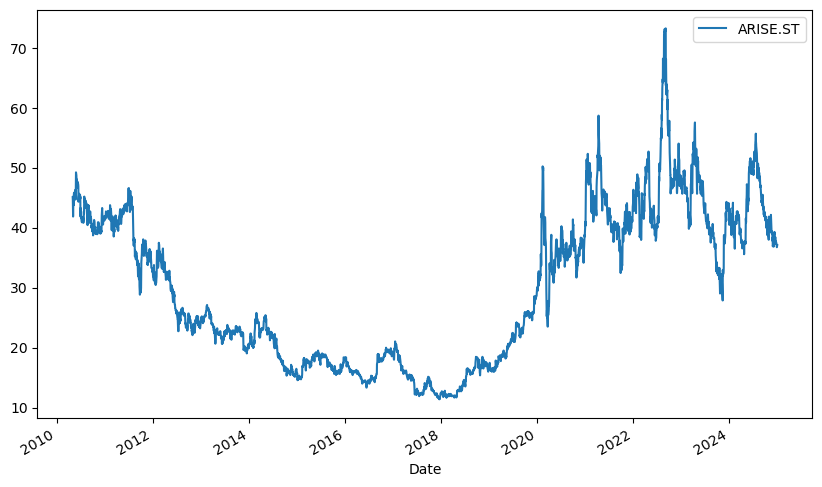

In [19]:
# Extract data from Yahoo Finance
ticker = 'ARISE.ST'
stock_data = pd.DataFrame()
stock_data[ticker] = yf.download(ticker, start = '2010-05-01', end = '2025-01-03')['Close']

# Plot closing prices
stock_data.plot(figsize = (10,6))
plt.show()

### Distributions - Calculate Historical Returns and Statistical Measures

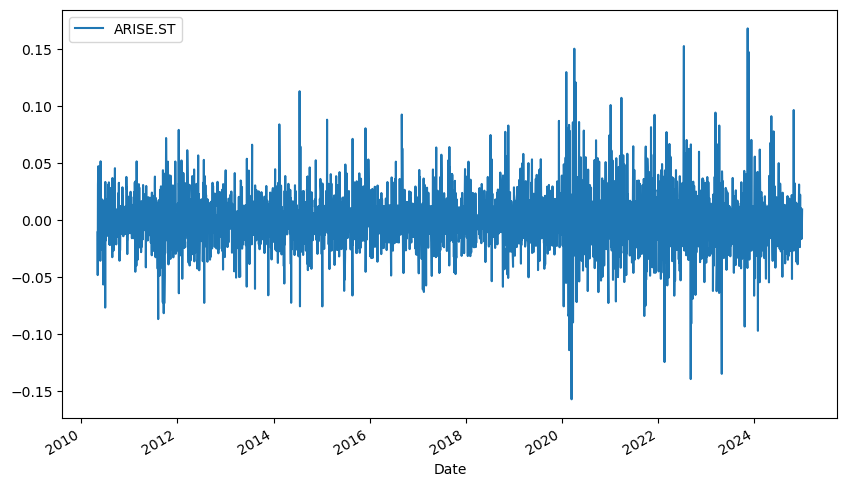

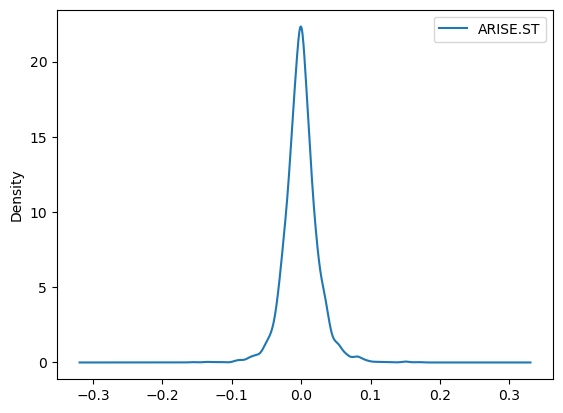

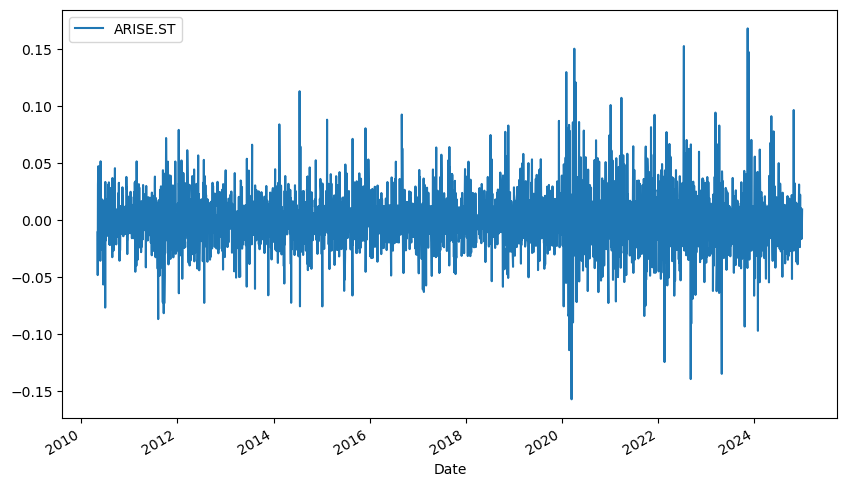

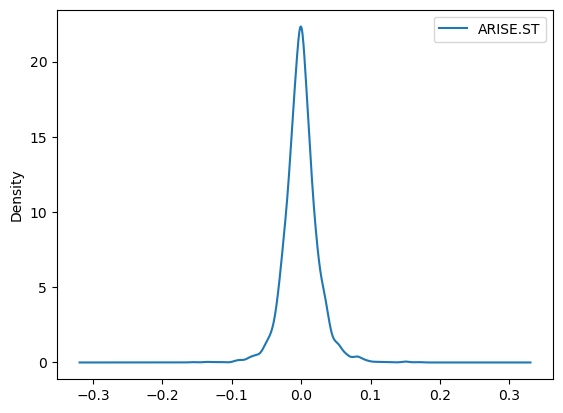

In [47]:
# Calculate historical log returns
log_returns = np.log(1 + stock_data.pct_change())

# Show all the log returns
log_returns.plot(figsize = (10,6))
plt.show()

# Show the distribution of the log returns
log_returns.plot.density()
plt.show()

In [49]:
# Calculate key statistic measures
mean = log_returns.mean()
variance = log_returns.var()
STD = log_returns.std()

### Simulations - Simulate Future Daily Returns and Future Prices

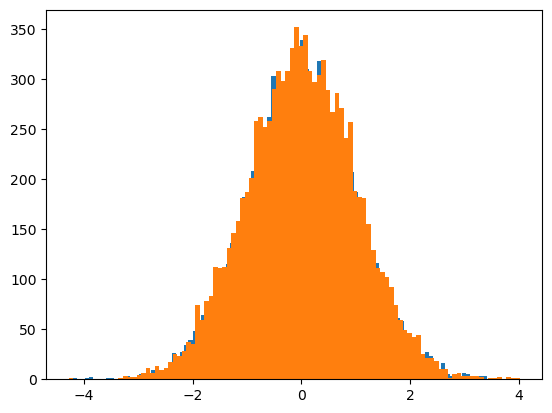

In [53]:
# How to generate 10,000 random numbers betwen 0 and 1.
random_numbers = np.random.rand(10000)

# Use those randomly generated numbers to sample from a normal distribution
normal_random_numbers = norm.ppf(random_numbers) 

# Plot each of the 10,000 randombly generated numbers from the normal distribution
plt.hist(normal_random_numbers, bins = 100)
plt.show()

In [57]:
# Simulate future daily returnst_intervals = 250
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)
daily_simplereturns_simulated.shape

(250, 10000)

In [59]:
# Using returns, calculate future price progression
# Latest known stock price for Arise
last_price = stock_data.iloc[-1]

# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated)

# Set the first row to the starting stock price
price_list[0] = last_price

price_list

array([[37.09999847, 37.09999847, 37.09999847, ..., 37.09999847,
        37.09999847, 37.09999847],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

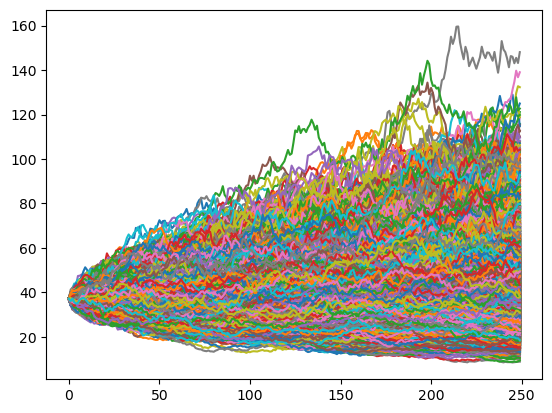

In [71]:
# Apply a for loop for simulated prices
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturns_simulated[t]
    
# Plot simulated future prices
plt.plot(price_list)
plt.show()

### Including Drift

In [29]:
# Calculate drift
drift = mean - (0.5*variance)

# Simulate future daily returns
t_intervals = 250
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_logreturns_simulated_withdrift = daily_logreturns_simulated + drift.values
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated_withdrift)

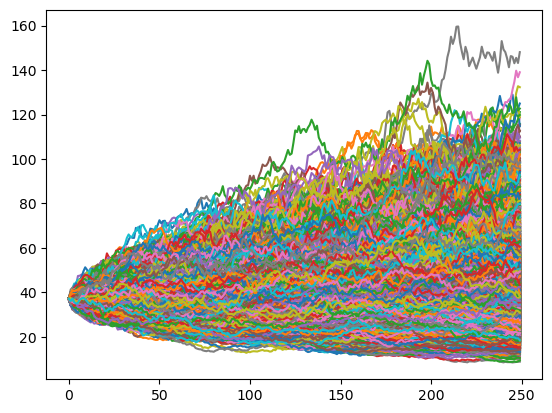

In [73]:
# Create a variable for the latest price of Arise
last_price = stock_data.iloc[-1]

# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated)

# Set the first row to the starting stock price
price_list[0] = last_price

# Apply a for loop for simulated prices
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturns_simulated[t]

# Plot simulated future Arise prices
plt.plot(price_list)
plt.show()

### Quantifications - Examine the worst, average, best scenarios and the probability distribution

In [93]:
# Calculate worst, avg and best scenarios
WorstSim = round(price_list[-1].min(), 2)
AvgSim = round(price_list[-1].mean(), 2)
BestSim = round(price_list[-1].max(), 2)

# Examine the worst, average, and best stock price sceanrios
print('Best & Worst Cases')
print(f'Worst Simulation SEK/share: {WorstSim}')
print(f'Average Simulation SEK/share: {AvgSim}')
print(f'Best Simulation SEK/share: {BestSim}')

# Set up confidence intervals
Mean_Day250Prices = price_list[-1].mean()
SD_Day250Prices = price_list[-1].std()
UpperInterval_1SD = Mean_Day250Prices + 1*SD_Day250Prices
LowerInterval_1SD = Mean_Day250Prices - 1*SD_Day250Prices
UpperInterval_2SD = Mean_Day250Prices + 2*SD_Day250Prices
LowerInterval_2SD = Mean_Day250Prices - 2*SD_Day250Prices

# Print out the price range within the confidence intervals
print ('\n' + 'Confidence Interval')
print(f'1 Sigma (1 S.D.): 68% confident that price after 250 days will fall between: SEK {round(LowerInterval_1SD,2)} and SEK {round(UpperInterval_1SD,2)}')
print(f'2 Sigma (2 S.D.): 95% confident that price after 250 days will fall between: SEK {round(LowerInterval_2SD,2)} and SEK {round(UpperInterval_2SD,2)}')

Best & Worst Cases
Worst Simulation SEK/share: 8.85
Average Simulation SEK/share: 40.01
Best Simulation SEK/share: 148.06

Confidence Interval
1 Sigma (1 S.D.): 68% confident that price after 250 days will fall between: SEK 24.13 and SEK 55.88
2 Sigma (2 S.D.): 95% confident that price after 250 days will fall between: SEK 8.26 and SEK 71.76


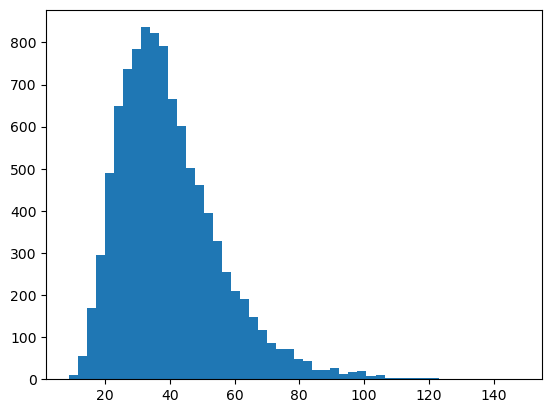

In [121]:
plt.hist(price_list[-1], bins = 50)
plt.show()

In [119]:
prices_day250 = price_list[-1]
latest_price = last_price.iloc[0]
print(f'Latest price: {round(latest_price,2)}')

# Calculate the number of simulated prices above the latest price
count_above_latest = (prices_day250 > latest_price).sum()

# Total number of simulations
total_simulations = len(prices_day250)

# Calculate the probability
probability_above_latest = count_above_latest / total_simulations

print(f"Probability of price at day 250 being above the latest price: {probability_above_latest:.4f}")

Latest price: 37.1
Probability of price at day 250 being above the latest price: 0.5035
